# Aim:

The aim of this project is to predict the safety of the car. In this project, I build a Decision Tree Classifier to predict the safety of the car using Decision Tree Classification with Python and Scikit-Learn. 

The dataset used here is the Car Evaluation Data Set, downloaded from the UCI Machine Learning Repository website.


# Dataset description

I have used the Car Evaluation Data Set downloaded from the UCI Machine Learning Repository website. The data set can be found at the following url:-

http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for expert system for decision making. The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

It was donated by Marko Bohanec.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
df = pd.read_csv('car.data.csv', header=None)

# Exploratory Data Analysis

In [3]:
# To check the dimensions of the dataset

df.shape

(1728, 7)

We can see that there are 1728 instances and 7 variables in the data set.

In [4]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns.

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [6]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


We can see that the column names are renamed. Now, the columns have meaningful names.

### View Summary of Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables

In [8]:
for i in col_names:
    
    print(df[i].value_counts())

med      432
low      432
high     432
vhigh    432
Name: buying, dtype: int64
med      432
low      432
high     432
vhigh    432
Name: maint, dtype: int64
3        432
2        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
med     576
high    576
low     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

### Summary of variables

* There are 7 variables in the dataset. All the variables are of categorical data type.

* These are given by buying, maint, doors, persons, lug_boot, safety and class.

* class is the target variable.

### Missing values in variables

In [9]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

# Declare feature vector and target variable

In [10]:
x = df.drop(['class'], axis=1)

y = df['class']

# Splitting data into separate training and test dataset

In [11]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [12]:
# check the shape of X_train and X_test

x_train.shape, x_test.shape

((1157, 6), (571, 6))

# Feature Engineering

In [13]:
# check data types in X_train

x_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Encode categorical variables

In [14]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [15]:
# import category encoders

import category_encoders as ce

In [16]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

In [17]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [18]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


# Random Forest Classifier model with default parameters

In [19]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier


In [20]:
# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Predict the Test set result

In [21]:
y_pred = rfc.predict(x_test)

### Check accuracy score

In [22]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)
acc_score

0.9457092819614711

# Random Forest Classifier model with parameter n_estimators=100

In [23]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Predict the Test set result

In [24]:
y_pred_100 = rfc_100.predict(x_test)

### Check accuracy score

In [25]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

acc_score_100 = accuracy_score(y_test, y_pred_100)
acc_score_100

0.9457092819614711

**The model accuracy score with 10 decision-trees is 0.9247 but the same with 100 decision-trees is 0.9457. So, as expected accuracy increases with number of decision-trees in the model.**

# Feature Importance with Random Forest

In [26]:
# view the feature scores

feature_scores = pd.Series(rfc_100.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

We can see that the most important feature is safety and least important feature is doors.

# Visualize the feature scores of the features

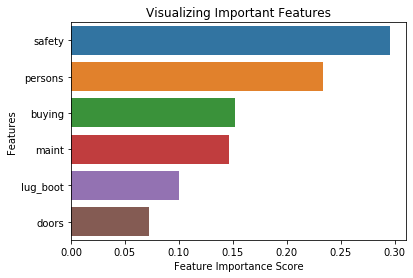

In [27]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

# Re-build the Random Forest model on selected features

First drop the least important feature doors from the model, rebuild the model and check its effect on accuracy.

In [28]:
# declare feature vector and target variable

x_new = df.drop(['class', 'doors'], axis=1)

y_new = df['class']

In [29]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size = 0.33, random_state = 42)

In [30]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


x_train_new = encoder.fit_transform(x_train_new)

x_test_new = encoder.transform(x_test_new)

In [31]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100 , random_state=0)

# fit the model to the training set

clf.fit(x_train_new, y_train_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [32]:
# Predict on the test set results

y_pred_new = clf.predict(x_test_new)

In [33]:
# Check accuracy score 

acc_score_fs = accuracy_score(y_test_new, y_pred_new)
acc_score_fs

0.9264448336252189

I have removed the doors variable from the model, rebuild it and checked its accuracy. The accuracy of the model with doors variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9247. So, we can see that the model accuracy has been improved with doors variable removed from the model.

Furthermore, the second least important model is lug_boot. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. To slve this issue, we will print confusion matrix

# Confusion Matrix

In [34]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_new, y_pred_new)
cm

array([[104,  12,  10,   3],
       [  0,  18,   0,   2],
       [ 10,   0, 387,   0],
       [  3,   2,   0,  20]], dtype=int64)

# Classification Report

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test_new, y_pred_new))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571



# Results and conclusion

1. In this project, I build a Random Forest Classifier to predict the safety of the car. I build two models, one with 10 decision-trees and another one with 100 decision-trees.

2. The model accuracy score with 10 decision-trees is 0.9247 but the same with 100 decision-trees is 0.9457. So, as expected accuracy increases with number of decision-trees in the model.

3. I have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy. The most important feature is safety and least important feature is doors.

4. I have removed the doors variable from the model, rebuild it and checked its accuracy. The accuracy of the model with doors variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9247. So, we can see that the model accuracy has been improved with doors variable removed from the model.

5. The second least important model is lug_boot. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.

6. Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance.